# 5a Plotting With Pyradi: General Plotter Functionality and Cartesian Plots

This notebook forms part of a series on [computational optical radiometry](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi).  The notebooks can be downloaded from [Github](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi). These notebooks are constantly revised and updated, please revisit from time to time.  

[<img src="https://zenodo.org/badge/doi/10.5281/zenodo.9910.png"   align="left"/>](http://dx.doi.org/10.5281/zenodo.9910)

The date of this document and module versions used in this document are given at the end of the file.  
Feedback is appreciated: neliswillers at gmail dot com.

## Overview

The pyradi library has a module, [`pyradi.ryplot`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html),
to simplify plotting. The module is a productivity wrapper around Matplotlib's [pyplot library](http://matplotlib.org/api/pyplot_api.html), which is in turn a wrapper around [Matplotlib](http://matplotlib.org/).

All that can can be done `pyradi.ryplot` can also be done with raw Matplotlib or pyplot.  The productivity gained with `pyradi.ryplot` stems from the fact that plots and plot properties are all combined into a single function call. So, with just one call a complete graph can be drawn. The code is compact and there is no need to hunt through many pages of documentation to find the appropriate command for some graph attribute. You would, however, have to consult the ryplot documentation for information on the long list of function parameters.

Of course, you can mix the use Matplotlib and `pyradi.ryplot`  as well: there are many cases where the `pyradi.ryplot` functionality will not be sufficient for your need. In these cases, starting from the `pyradi.ryplot` code, you might get pointers on how to solve your specific plotting need.

An understanding of the [Matplotlib history and architecture](http://www.aosabook.org/en/matplotlib.html) is not essential to use `pyradi.ryplot` but it may be useful background reading.  `pyradi.ryplot` covers a relatively small part of the full scope of raw Matplotlib or pyplot - there are immense power and many more graphs available in Matplotlib and pyplot, so if `pyradi.ryplot` is too limiting in some area, consider reading wider.

This notebook covers a general introduction to plotting and creating Cartesian (x,y) plots. Other plot types are covered in the next notebook in the series.

## Plotly

Since December 2017 ryplot has limited plotly support, thanks to Seretla Mahlagare.  This implementation is not well-tested as yet and should be considered experimental.

Install plotly on Anaconda with (https://anaconda.org/plotly/plotly)

    conda install -c plotly plotly 
    
Not all ryplot functions support plotly.  To use plotly in the supported functions add the parameter `useplotly=True`. If the function call fails, it does not support plotly yet.

When using plotly inside ryplot, do the following:

1.  Use the function parameter `useplotly=True` during the Plotter class instantiation.

2.  Call the plotly plot function `plotlyPlot()` after the plot configuration.

As in 

    A = ryplot.Plotter(1, 2, 2,'Plots of Random Arrays',figsize=(6,6),useplotly=True);
    A.semilogY(4, x, a);
    A.plotlyPlot()

The plotly graph is not embedded in the notebook, it is opened as an external HTML page.  The notebook only shows empty graph axes with no plot data.

## Preparing 

In [1]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

In [2]:
%matplotlib inline
# %matplotlib notebook
# %matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt

# %reload_ext autoreload
# %autoreload 2

import pyradi.ryplot as ryplot

Create a data set for demonstration plotting purposes. This function returns three objects: (1) the domain (x value), (2) the specified number of data columns (y values) of the same length as the domain, (3) a set of labels to match the data columns.

In [3]:
def createRandomColumns(number, scale, gain, xRange=10):
    #first create the domain
    x = np.linspace(0, xRange, 50).reshape(-1, 1)
    #now create number of rows and labels for rows
    labels = []
    for i in range(number):
        y = scale * (gain ** i) * np.random.random(x.shape[0]).reshape(-1, 1)
        if i == 0:
            a = y
        else:
            a = np.hstack((a, y))
        labels.append('Label {}'.format(i))
            
    return x, a, labels

## Introductory Example

This introductory example creates and plots a random data set on four variations of linear and logarithmic scales.  The examples demonstrate that an arbitrary number of lines can be drawn on the plot, given as columns in the y-value array. If your code can assemble the lines as an array, they can all be drawn in a single plot command.
Some line styles and colours are specified while others are taken from a pre-loaded sequence. The plots are duly labelled with titles, x-labels, y-labels and legend labels.

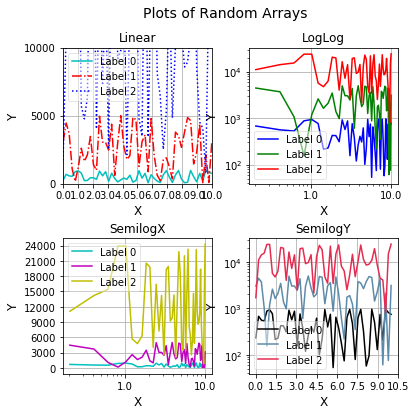

In [4]:
x, a, labels = createRandomColumns(3, 1e3, 5.)
A = ryplot.Plotter(1, 2, 2,'Plots of Random Arrays',figsize=(6,6));
A.plot(1, x, a, "Linear","X", "Y",label=labels,
    plotCol=['c','r','b'],linestyle=['-','-.',':'],
    legendAlpha=0.5,pltaxis=[0, 10, 0, 10000], maxNX=10, maxNY=2);
A.logLog(2, x, a, "LogLog","X", "Y",label=labels,legendAlpha=0.5);
A.semilogX(3, x, a, "SemilogX","X", "Y",label=labels,legendAlpha=0.5);
A.semilogY(4, x, a, "SemilogY","X", "Y",label=labels,legendAlpha=0.5);

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]



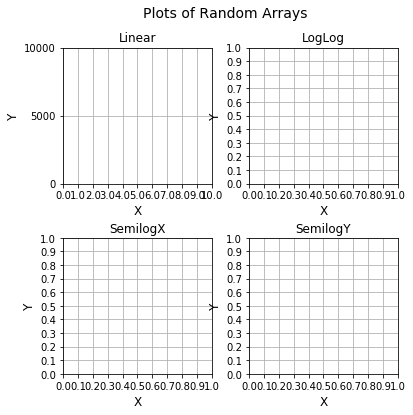

In [5]:
if ryplot.imported_plotly:
    x, a, labels = createRandomColumns(3, 1e3, 5.)
    A = ryplot.Plotter(1, 2, 2,'Plots of Random Arrays',figsize=(6,6),useplotly=True);
    A.plot(1, x, a, "Linear","X", "Y",label=labels,
        plotCol=['c','r','b'],linestyle=['-','-.',':'],
        legendAlpha=0.5,pltaxis=[0, 10, 0, 10000], maxNX=10, maxNY=2);
    A.logLog(2, x, a, "LogLog","X", "Y",label=labels,legendAlpha=0.5);
    A.semilogX(3, x, a, "SemilogX","X", "Y",label=labels,legendAlpha=0.5);
    A.semilogY(4, x, a, "SemilogY","X", "Y",label=labels,legendAlpha=0.5);
    A.plotlyPlot()


pyradi can also plot stacked line graphs.  Note however, that ryplot expects the respective data sets to be in different columns, running acros rows down a single column for a single dataset.


(10,) (10, 3)


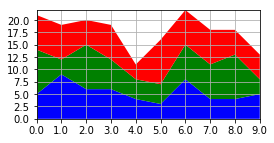

In [6]:
fnx = lambda : np.random.randint(3, 10, 10).reshape(-1,1)
y = np.hstack((fnx(), fnx(), fnx()))   
x = np.arange(10) 
print(x.shape, y.shape)

p = ryplot.Plotter(1,1,1,figsize=(4,2))
p.stackplot(1,x,y);

Type a ; after the plot commands to prevent the object `<>`  output sometime seen, as  in the previous plot

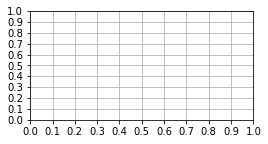

In [7]:
if ryplot.imported_plotly:
    fnx = lambda : np.random.randint(3, 10, 10).reshape(-1,1)
    y = np.hstack((fnx(), fnx(), fnx()))   
    x = np.arange(10) 
    p = ryplot.Plotter(1,1,1,figsize=(4,2),useplotly=True)
    p.stackplot(1,x,y);
    p.plotlyPlot()

## Plotter Class

The [`ryplot.Plotter`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter) class provides the plotting capability.  The class is initiated with the following parameter signature

`Plotter(fignumber=0, subpltnrow=1, subpltncol=1, figuretitle=None, figsize=(9,9))`

- `fignumber (int)`  
Used to identify the figure.  The figure number given here is passed along when initiating the [`matplotlib.pyplot.figure`](http://matplotlib.org/api/pyplot_api.html) figure.
If a figure with this number already exists, it will be made active and a reference will be returned to the existing figure. 
If the same figure is used twice in the same IPython notebook cell, the original figure is replaced by the subsequent figure with the same number.  Figure numbers may repeat in different cells. 

- `subpltnrow (int)` and `subpltncol (int)`  
The figure can contain subplots in a regular grid ([`GridSpec`](http://matplotlib.org/users/gridspec.html) is not yet supported).
The `subpltnrow` and `subpltncol` defines how many rows and columns of subplots there must be.  Even if there is only one subplot, it must be indicated as a 1,1 number of subplots.

- `figuretitle (string)`  
This string is the overall title for the figure, displayed above all subplots.

- `figsize ((w,h))`  
This tuple defines the figure size (width, height) in inches.

A Plotter instance is assigned to a name and subsequently used to access the instance. The following command creates a new Plotter instance, with subplots, with a figure title and a figure size.

In [8]:
import pyradi.ryplot as ryplot
p = ryplot.Plotter(1, 2, 1,'Figure Title',figsize=(12,8))

Once a Plotter instance is assigned to a name, the name can be used at any time to access the plot.  The plot does not have to be selected to be current, just use the instance name.
In the following example three instances are created and two plots are made in succession to each of the three instances.   This example shows that you can revisit a plot at any time to add new lines to those already present in the plot. Matplotlib and IPtython kindly inline all three the graphs when complete.

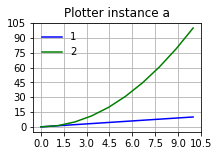

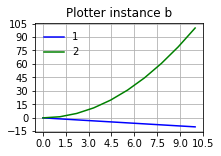

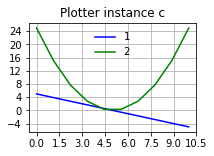

In [9]:
x = np.linspace(0,10,10)
a = ryplot.Plotter(1,figsize=(3,2))
b = ryplot.Plotter(2,figsize=(3,2))
c = ryplot.Plotter(3,figsize=(3,2))
for i in [1,2]:
    a.plot(1,x,x ** i,'Plotter instance a',label=[str(i)])
    b.plot(1,x,(-x) ** i,'Plotter instance b',label=[str(i)])
    c.plot(1,x,(5-x) ** i,'Plotter instance c',label=[str(i)])

### Saving plots to file

#### Saving png images from the notebook

Use the following magic to tell Jupyter to plot the image inline in the notebook:

    %matplotlib inline
    
Once the plot is drawn and displayed in the notebook, right-click on the picture and select the browser's save image option from the context menu.    

#### Using ryplot.saveFig()


The Plotter class supports saving graphs to files on disk, as well as inlining graphs to a notebook cell.

One of matplotlib's design choices is a bounding box strategy which may result in a bounding box
that is smaller than the size of all the objects on the page.  It took a while to figure this out,
but the current default values for bbox_inches and pad_inches seem to create meaningful
bounding boxes. These are however larger than the true bounding box. You still need a
tool such as epstools or Adobe Acrobat to trim eps files to the true bounding box.


Saving graph files to disk is done with the saveFig function:   
`saveFig(filename='mpl.png', dpi=300, bbox_inches='tight', pad_inches=0.1, useTrueType=True)`

- `filename (string)`  output filename to write plot. The type of file written is picked up in the filename.  Most backends support png, pdf, ps, eps and svg.

- `dpi (int)`  the resolution of the graph (if a bitmap) in dots per inch.

- `bbox_inches`  see matplotlib [docs](http://matplotlib.org/api/figure_api.html) for more detail.

- `pad_inches`  see matplotlib [docs](http://matplotlib.org/api/figure_api.html) for more detail.

- `useTrueType`  if True, truetype fonts are used in eps/pdf files, otherwise use Type3 fonts.

For most uses, just provide the filename and type, use the default values for the rest.


Some versions of MatPlotLib/Jupyter notebooks do not allow saveFig if the plots are also drawn inline in a Jupyter notebook.  If saveFig does not work while the backend is set to `inline`, comment out the following line to prevent inline plots, then saveFig should work.

    %matplotlib inline
    


The file types available for export depends on the Matplotlib backend in use. The available file types can be [obtained](https://stackoverflow.com/questions/7608066/in-matplotlib-is-there-a-way-to-know-the-list-of-available-output-format) using the `matplotlib.pyplot.figure().canvas.get_supported_filetypes()` function, which returns a dictionary describing the plot types.

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}
****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 
****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 


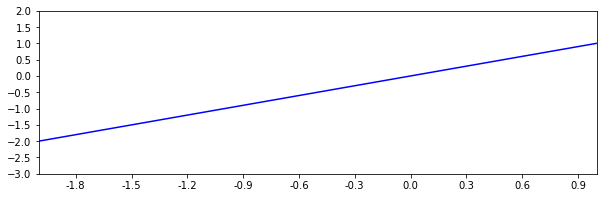

In [10]:
x = np.linspace(-30,40,200)
p = ryplot.Plotter(0,1,1,figsize=(10,3))
p.plot(1,x,x,pltaxis=[-2,1,-3,2],drawGrid=False)
print(p.getPlot().canvas.get_supported_filetypes())
p.saveFig('savegraph.png')
p.saveFig('savegraph.svg')


#### Using ryplot.PdfPages()

The Plotter class supports saving graphs to PDF files, even if the plots are displayed inline.

{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}
****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 
****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 


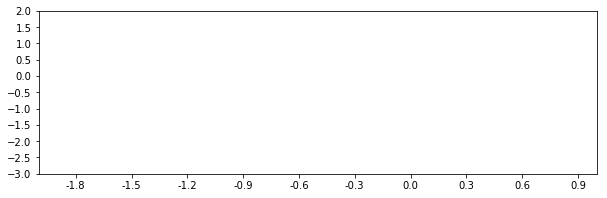

In [11]:
if ryplot.imported_plotly:
    x = np.linspace(-30,40,200)
    p = ryplot.Plotter(0,1,1,figsize=(10,3),useplotly=True)
    p.plot(1,x,x,pltaxis=[-2,1,-3,2],drawGrid=False)
    print(p.getPlot().canvas.get_supported_filetypes())
    p.saveFig('savegraph.png')
    p.saveFig('savegraph.svg')
    p.plotlyPlot()


{'ps': 'Postscript', 'eps': 'Encapsulated Postscript', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format'}


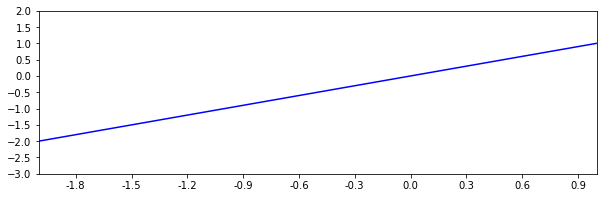

In [12]:
from matplotlib.backends.backend_pdf import PdfPages

x = np.linspace(-30,40,200)
p = ryplot.Plotter(0,1,1,figsize=(10,3))
p.plot(1,x,x,pltaxis=[-2,1,-3,2],drawGrid=False)
print(p.getPlot().canvas.get_supported_filetypes())

#create the pdf document
pdfDoc = 'pltpdfpages.pdf'
pdf_pages = ryplot.PdfPages(pdfDoc)
pdf_pages.savefig(p.getPlot(),dpi=300)
# Write the PDF document to the disk
pdf_pages.close()


### Plot line colour and style

The line colour/style can be defined in three different ways:

1. Use the default line colour.  The default colour is as follows:  
           ['b', 'g', 'r', 'c', 'm', 'y', 'k',
            '#5D8AA8','#E52B50','#FF7E00','#9966CC','#CD9575','#915C83',
            '#008000','#4B5320','#B2BEB5','#A1CAF1','#FE6F5E','#333399',
            '#DE5D83','#800020','#1E4D2B','#00BFFF','#007BA7','#FFBCD9']

    These colours can be  (one of the [matplotlib colours](http://matplotlib.org/api/colors_api.html#module-matplotlib.colors): ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    or it can be a gray shade float value between 0 and 1, such as '0.75', or it can
    be in hex format '#eeefff' or it can be one of the legal html colours. A counter in 
    Plotter keeps track of the current colour and iterates through the list of 
    colour.  When the end of the list is encountered, it starts again from the beginning 
    (circular list). 
   
   

2. The user specifies a new series of colours, different from the default set. The function  [`ryplot.buildPlotCol(plotCol=None, n=None)`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.buildPlotCol) can be used to build a new sequence of colours.  This sequence `plotCol` must be similar to the list shown above.  The variable `n` determines the length of the new sequence. If `n` is longer than the supplied sequence, the full length of the sequence is filled by starting from the beginning. If `n=None`, the value will be calculated from `n=len(plotCol)`.  This user-supplied list is used in the place of the default list, if none is given, the default set is used.

3. For each line in a plot define the specific colour and style in the plot command.  The `plotCol` parameter defines the colour to be used, and must be given as a list of strings, one string for each line in the plot.  If an array is used to plot multiple lines, there must be a colour for each line, otherwise the last colour is repeated.

The user can reset the colour counter to start again at the beginning of the colour sequence by calling the function [`ryplot.resetPlotCol()`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.resetPlotCol).

See
    http://html-color-codes.info/  
    http://www.computerhope.com/htmcolor.htm  
    http://latexcolor.com/  

See also   [line style](http://matplotlib.org/api/artist_api.html#matplotlib.lines.Line2D.set_linestyle).


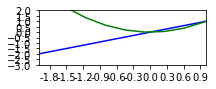

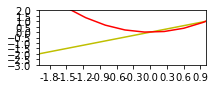

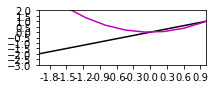

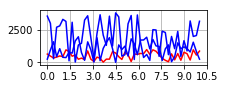

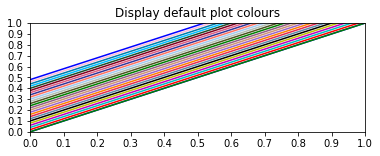

In [13]:
import numpy as np

x = np.linspace(-30,40,200)
p = ryplot.Plotter(0,1,1,figsize=(3,1))
p.plot(1,x,x,pltaxis=[-2,1,-3,2],drawGrid=False)
p.plot(1,x,x**2,pltaxis=[-2,1,-3,2],drawGrid=False)

q = ryplot.Plotter(1,1,1,figsize=(3,1))
q.buildPlotCol(['y','r'])
q.plot(1,x,x,pltaxis=[-2,1,-3,2],drawGrid=False)
q.plot(1,x,x**2,pltaxis=[-2,1,-3,2],drawGrid=False)

r = ryplot.Plotter(2,1,1,figsize=(3,1))
r.plot(1,x,x,plotCol=['k'], pltaxis=[-2,1,-3,2],drawGrid=False)
r.plot(1,x,x**2,plotCol=['m'],pltaxis=[-2,1,-3,2],drawGrid=False)

x, a, labels = createRandomColumns(3, 1e3, 2.)
s = ryplot.Plotter(3, 1,1,figsize=(3,1))
s.plot(1, x, a, plotCol=['r','b'], maxNX=10, maxNY=2);

x = np.linspace(0,1,200).reshape(-1,1)
t = ryplot.Plotter(4,1,1,figsize=(6,2))
y = x
for i in range(len(t.plotCol)):
    y = np.hstack((y,x+i*0.02))
t.plot(1,x,y,'Display default plot colours',pltaxis=[0,1,0,1],drawGrid=False)


The [Matplotlib 1.5 documention](http://matplotlib.org/api/colors_api.html)  states that colours can also be specified in HTML colour format.  I have had mixed success with the ['#ddffaa'](http://www.w3schools.com/tags/ref_colorpicker.asp) format as well as with the [HTML named colour](http://www.w3schools.com/tags/ref_colorpicker.asp) specifiers. 




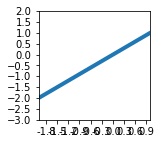

In [14]:
x = np.linspace(-30,40,200)
p = ryplot.Plotter(0,1,1,figsize=(2,2))
p.plot(1,x,x,plotCol='olive', linewidths=[4],pltaxis=[-2,1,-3,2],drawGrid=False)
# p.plot(1,x,x**2,pltaxis=[-2,1,-3,2],drawGrid=False)

Sometimes it is required to plot vertical or horizontal lines across the full size of the plot.  The `ryplot.verticalLineCoords` and `ryplot.horizontalLineCoords` functions return a tuple with the x values and y values for the lines.  These tuples can be unpacked in the `ryplot.plot` function as shown below.  There are also functions to return the extents of the two axes: `ryplot.getXLim` and `ryplot.getYLim`.

[-37.35  47.35]
[ -167.98883867  1767.99893942]


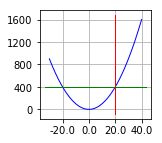

In [15]:
x = np.linspace(-30,40,200)
y = x * x
p = ryplot.Plotter(0,1,1,figsize=(2,2));
p.plot(1,x,y,linewidths=[1]);
vc = p.verticalLineCoords(subplotNum=1,x=20);
p.plot(1,*vc,linewidths=[1],plotCol=['r']);
hc = p.horizontalLineCoords(subplotNum=1,y=400);
p.plot(1,*hc,linewidths=[1],plotCol=['g'],maxNX=5, maxNY=5);

print(p.getXLim())
print(p.getYLim())


### Accessing Matplotlib/Pyplot functionality

`pyradi.ryplot` provides a small subset of the full Matplotlib/pyplot capability.  On occasion you may want to access the pyplot routines for additional functionality. `pyradi.ryplot` provides two functions to return a handle to figures and subplots.

The `pyradi.ryplot.getPlot()` functions returns a handle to the pyplot figure.  This handle allows the user to manipulate the figure as a whole. For example as in `A.getPlot().tight_layout()`.

The `pyradi.ryplot.getSubPlot(subplotNum = 1)` functions returns a handle to the designated subplot in the figure.  This handle allows the user to manipulate the graph in a subplot, adding labels, etc.  The example below demonstrates how the `getSubPlot` function is used to access pyplot functions to provide labels and annotation and to modify the tick line style.

(5, 0)

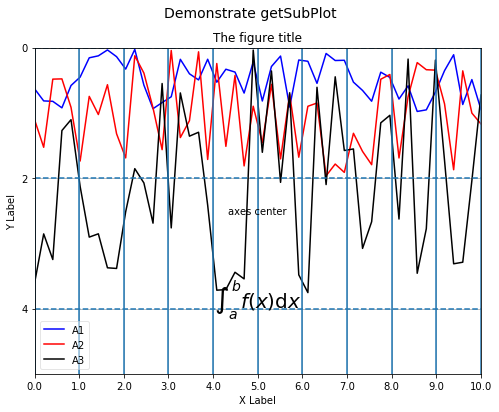

In [16]:
x, a, labels = createRandomColumns(3, 1, 2.)    
AA = ryplot.Plotter(1, 1, 1,'Demonstrate getSubPlot',figsize=(8,6))
AA.plot(1, x, a, plotCol=['b','r','k'],
       label=['A1', 'A2', 'A3'],legendAlpha=0.5,
       pltaxis=[0, 10, 0, 5], maxNX=10, maxNY=3)
currentP = AA.getSubPlot(1)
currentP.set_xlabel('X Label')
currentP.set_ylabel('Y Label')
currentP.set_title('The figure title')
currentP.annotate('axes center', xy=(.5, .5),  xycoords='axes fraction',
            horizontalalignment='center', verticalalignment='center')
currentP.text(0.5 * 10, 4, r"$\int_a^b f(x)\mathrm{d}x$", 
              horizontalalignment='center', fontsize=20)
for xmaj in currentP.xaxis.get_majorticklocs():
    currentP.axvline(x=xmaj,ls='-')
for xmin in currentP.xaxis.get_minorticklocs():
    currentP.axvline(x=xmin,ls='--')
for ymaj in currentP.yaxis.get_majorticklocs():
    currentP.axhline(y=ymaj,ls='--')
for ymin in currentP.yaxis.get_minorticklocs():
    currentP.axhline(y=ymin,ls='-.')
    
# invert the y axes 
currentP.set_ylim(5,0)
    
    

### Automatically saving plot files with the `with` context manager

The [`ryplot.savePlot`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.savePlot)
function implements a `with` context manager that automatically saves the graph to a file at the conclusion of the `with` code segment.
The [`ryplot.savePlot`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.savePlot) parameters are exactly the same as  for the [`ryplot.Plotter`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter) class,  

`savePlot(fignumber=0,subpltnrow=1,subpltncol=1,
                 figuretitle=None, figsize=(9,9), saveName=None)`
                 
except that a new named parameter `saveName` is now present. `saveName` can be a string or a list of strings.    If `saveName` is not `None`, the list of filenames is used to
save files of the plot (any number of names/types).



****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 
****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 


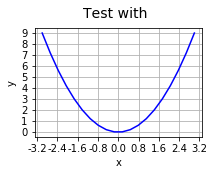

In [17]:
# demonstrate the use of the contextmanager and with statement
x = np.linspace(-3,3,20)
with ryplot.savePlot(1,1,1,'Test with',figsize=(3,2),
                     saveName=['testwith.png','testwith.eps']) as p:
    ax = p.plot(1,x,x*x)
    p.labelSubplot(ax,xlabel='x',ylabel='y')

### 'Square' or 'equal' axes

You can force a graph's axes to have equal length on both axes by setting the `equal` attribute:


    p.getSubPlot(1).axis('equal')


The ryplot.plot() function now also has a parameter to force equal axes:

    axesequal (bool) force scaling on x and y axes to be equal (optional)
    
   


****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 
****  If saveFig does not work inside the notebook please comment out the line "%matplotlib inline" 


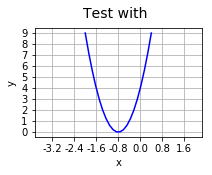

In [18]:
# demonstrate the use of axis equal 
x = np.linspace(-3,3,20)
with ryplot.savePlot(1,1,1,'Test with',figsize=(3,2),
                     saveName=['testwith.png','testwith.eps']) as p:
    ax = p.plot(1,x,x*x, axesequal=True)
    p.labelSubplot(ax,xlabel='x',ylabel='y')

### Multiple axes (twin axes)

There can be multiple axes on a plot.  Look out for the `twinx` and `twiny` commands, [here](http://matplotlib.org/faq/howto_faq.html),  [here](http://matplotlib.org/examples/api/two_scales.html), [here](http://stackoverflow.com/questions/3136800/matplotlib-one-line-plotted-against-two-related-x-axes-in-different-units), and [here](http://matplotlib.org/examples/pylab_examples/multiple_yaxis_with_spines.html).

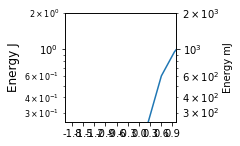

In [19]:
x = np.linspace(-30,40,200)
p = ryplot.Plotter(0,1,1,figsize=(2,2))
p.semilogY(1,x,x,'','','Energy J',plotCol='olive',pltaxis=[-2,1,-3,2],drawGrid=False)
# p.plot(1,x,x**2,pltaxis=[-2,1,-3,2],drawGrid=False)

currentP = p.getSubPlot(1)
ylim1, ylim2 = currentP.get_ylim()
ax2 = currentP.twinx()
ax2.set_yscale('log')
ax2.set_ylim(ylim1 * 1e3, ylim2* 1e3)
ax2.set_ylabel('Energy mJ')
        

The following example does not use pyradi functionality, it falls back on pyplot.

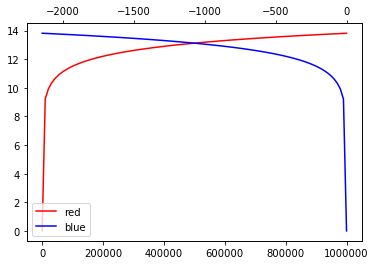

In [20]:
import matplotlib.pyplot as plt
x1 = np.linspace(1,1000000,100)
x2 = x1 / (-466.0)
y1 = np.log(x1)

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()
line1, = ax1.plot(x1,y1,'r')
line2, = ax2.plot(x2,y1,'b')

plt.legend((line1, line2), ('red', 'blue'));


### Multipage PDF output

`ryplot` can create multipage PDF output, with a different graph on each page, using  [matplotlib.backends.backend_pdf](http://matplotlib.org/1.3.1/api/backend_pdf_api.html). This is useful when running repeated experiments with multiple graphs per run, when the PDF collects all the graphs in one file. The model is to create a PdfPages backend and then save the graphs to this backend:

    from matplotlib.backends.backend_pdf import PdfPages
    with PdfPages('foo.pdf') as pdf:
        # As many times as you like, create a figure fig and save it:
        # When no figure is specified the current figure is saved
        pdf.savefig(fig)
        pdf.savefig()

The example below demonstrates use of this functionality.

<http://blog.marmakoide.org/?p=94>

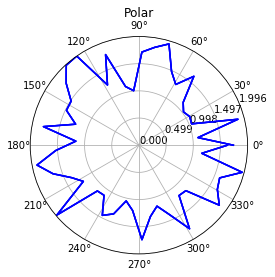

In [21]:
    x = np.linspace(0, 2*np.pi, 50).reshape(-1, 1)
    y = 1 + np.random.random(x.shape[0]).reshape(-1, 1)

    #create the pdf document
    pdf_pages = ryplot.PdfPages('multipagepdf.pdf')

    # create the first page
    A = ryplot.Plotter(1, 2, 1,figsize=(5,4))
    A.plot(1, x, y, "Array Linear","X", "Y")
    axa = A.logLog(2, x, y, "Array LogLog","X", "Y")
    pdf_pages.savefig(A.getPlot())

    #create the second page
    B = ryplot.Plotter(1, 1, 1,figsize=(5,4))
    axb = B.polar(1, x, y, "Polar")
    pdf_pages.savefig(B.getPlot())

    # Write the PDF document to the disk
    pdf_pages.close()

### Cartesian plotting routines

The 
[`ryplot.Plotter.plot`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.plot), 
[`ryplot.Plotter.semilogX`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.semilogX), 
[`ryplot.Plotter.semilogY`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.semilogY), and 
[`ryplot.Plotter.logLog`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.logLog) functions provide the four types of cartesian plots shown in the introductory example above. All four functions have the same  parameter signature

- `plotnum (int)`  The subplot number, 1-based index, according to Matplotlib conventions.  This value must always be given, even if only a single 1,1 subplot is used. 
- `x (np.array[N,] or [N,1])`  vector of abscissa (x axis) values.
- `y (np.array[N,] or [N,M])`  vector/array of ordinates (y axis) values - could be M columns. Number of rows N much match the number of abscissa rows.
- `ptitle (string)`  plot title (optional) for this subplot.
- `xlabel (string)`  x-axis label (optional) for this subplot.
- `ylabel (string)`  y-axis label (optional) for this subplot.
- `plotCol ([strings])`  plot line colour and style, list with M entries (optional), use class default if not supplied. Each new plot line is rendered with the next colour in the list, repeating the sequence if necessary. Entries in this list must be of the form `['b',  'g',  'r']` defining the colour in the first character and the linestyle with the remaining characters (optional).
- `linewidths ([float])` plot line width in points, list with M entries, use default if None  (optional).
- `label ([strings])`  legend label for each ordinate, list with M entries (optional).
- `legendAlpha (float)`  transparancy for legend box. This only works for bitmap files, not for eps files (optional).
- `legendLoc (string)` location for legend box, default value is `best` (optional).
- `pltaxis ([xmin, xmax, ymin,ymax])`  scale for x,y axes.  Let Matplotlib decide if None (optional).
- `maxNX (int)`  draw maxNX+1 tick labels on x axis, use this to control the density of the x-axis grid and tick label density (optional).
- `maxNY (int)`  draw maxNY+1 tick labels on y axis, use this to control the density of the y-axis grid and tick label density (optional).
- `linestyle (string)`  linestyle for this plot. Use this linestyle to override the style defined in `plotCol` (optional).
- `xScientific (bool)`  use scientific notation on x axis (optional).
- `yScientific (bool)`  use scientific notation on y axis (optional).
- `powerLimits[float]`   scientific tick label power limits [x-low, x-high, y-low, y-high]  (optional).  Scientific notation is used for data less than 10$^{\rm low}$ or data greater than 10$^{\rm high}$. Inside this range, the notation is fixed format.  For example `powerlimits=[-3, 4, -3, 4]` defines scientific notation is used for numbers less than 1e-3 or greater than 1e4. For this to work the x or y axis must be set to scientific notation (`xScientific` and/or `yScientific` must be `True`).
- `titlefsize (int)`  title font size, default 12pt (optional).
- `xylabelfsize (int)`  x-axis, y-axis  label font size, default 12pt (optional).
- `xytickfsize (int)`  x-axis, y-axis  tick font size, default 10pt (optional).
- `labelfsize (int)`  label/legend font size, default 10pt (optional).
- `drawGrid (bool)`  draw the grid on the plot (optional).
- `yInvert (bool)`  invert the y-axis. Flip the y-axis up-down. (optional).
- `xInvert (bool)`  invert the x-axis. Flip the x-axis left-right. (optional).
- `xIsDate (bool)`  convert the datetime x-values to dates. In this case the x values must be datetime dates (optional).
- `xTicks ({tick:label})`  dict of x-axis tick locations and associated labels. Define your own tick locations and their labels to have better control of the x-axis tick display (optional).
- `xtickRotation (float)` x-axis tick label rotation angle. Rotate the tick labels if these labels are too long and overlap with each other (optional).
- `markers ([string])` [markers](http://matplotlib.org/api/markers_api.html) to be used for plotting data points. Each (x,y) data point is indicated with this marker style (optional).
- `markevery` [None | int | (startind, stride)] use [`markevery`](http://matplotlib.org/api/artist_api.html#matplotlib.lines.Line2D.set_markevery) tosubsample the data set when using markers,  Values can be one of `None`, `integer` (mark every n'th value), or `(startind, stride)` (start at the first index and then mark mark every n'th value) (optional).
- `zorders` ([int]) list of zorder for drawing sequence, highest is last (optional).
- `clip_on` (bool) clips objects to drawing axes (optional).

The x and y axis limits can be defined for a plot, using `pltaxis`. If no axes limits are specified, Matplotlib will determine appropriate values.

The `drawGrid` function parameter can be used to control the display of the graph grid (`True` or `False`).

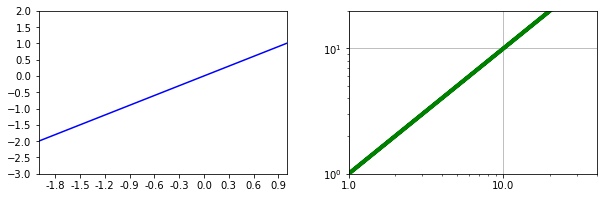

In [22]:
x = np.linspace(-30,40,200)
p = ryplot.Plotter(2,1,2,figsize=(10,3))
p.plot(1,x,x,pltaxis=[-2,1,-3,2],drawGrid=False)
p.logLog(2,np.abs(x),np.abs(x),pltaxis=[1, 40, 1,20], linewidths=[4]) ;   

Each plot line can be given a label/legend entry to identify the line.  To this end, the `label ([strings])` parameter is used.  The label is a list of strings, with one string for every line in the plot.  If a single line is plotted, a single string must be given, if multiple lines are plotted, the same number of strings must be given in the label list.

The `legendAlpha` parameter can be used to draw a box around the legend.  The alpha (transparency) can be adjusted, but this functionality is only available in bitmap file exports, not in vector graphics exports.

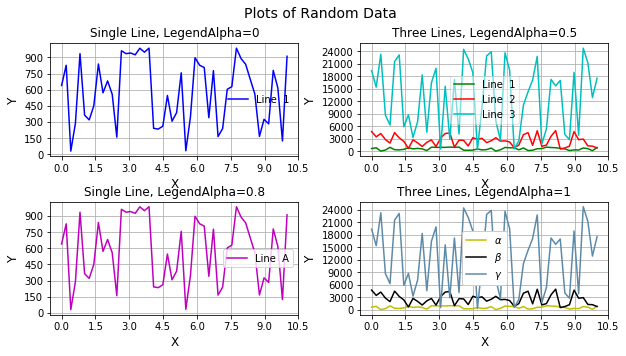

In [23]:
x, a, labels = createRandomColumns(3, 1e3, 5.)
A = ryplot.Plotter(1, 2, 2,'Plots of Random Data',figsize=(10,5))
A.plot(1, x, a[:,0], "Single Line, LegendAlpha=0", "X", "Y", label=['Line  1'],legendAlpha=0)
A.plot(2, x, a, "Three Lines, LegendAlpha=0.5", "X", "Y", label=['Line  1','Line  2','Line  3' ],legendAlpha=0.5)
A.plot(3, x, a[:,0], "Single Line, LegendAlpha=0.8", "X", "Y", label=['Line  A'],legendAlpha=0.8)
A.plot(4, x, a, "Three Lines, LegendAlpha=1", "X", "Y", label=[r'$\alpha$',r'$\beta$',r'$\gamma$'],legendAlpha=1);


The `maxNX` and `maxNY` parameters control how dense the major tick grid is, the graph will display so many major tick intervals.

In order to activate scientific notation on the figure axes, use 
`xScientific=True` or `yScientific=True`. The [`powerLimits`](http://matplotlib.org/api/ticker_api.html) variable defines the threshold value to switch between scientific and fixed point format (if scientific is switched on).

At the current time, it seems as if the x-axis scientific format in Pyplot is not working.

The `legendloc` keyword can be used to locate the legend in the plot window. It must be one of ‘best’,
‘upper right’,
‘upper left’,
‘lower left’,
‘lower right’,
‘right’,
‘center left’,
‘center right’,
‘lower center’,
‘upper center’,
‘center’.

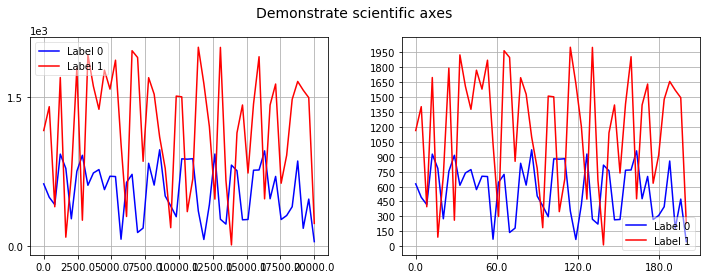

In [24]:
x, a, labels = createRandomColumns(2, 1e3, 2., 200)
AA = ryplot.Plotter(1, 1, 2,'Demonstrate scientific axes',figsize=(12,4))
AA.plot(1, 100*x, a, plotCol=['b','r'],
       label=labels,legendAlpha=0.5, legendLoc='upper left', maxNX=10, maxNY=2,
       xScientific=True,yScientific=True, powerLimits = [0, 0, 0, 0])
AA.plot(2, x, a, plotCol=['b','r'],
       label=labels,legendAlpha=0.5, legendLoc='lower right', maxNX=4, maxNY=20);

The font size for some graph elements can be adjusted, using the following function parameters:

- `titlefsize` (int) title font size, default 12pt (optional).
- `xylabelfsize` (int) x-axis, y-axis label font size, default 12pt (optional).
- `xytickfsize` (int) x-axis, y-axis tick font size, default 10pt (optional).
- `labelfsize` (int) label/legend font size, default 10pt (optional).


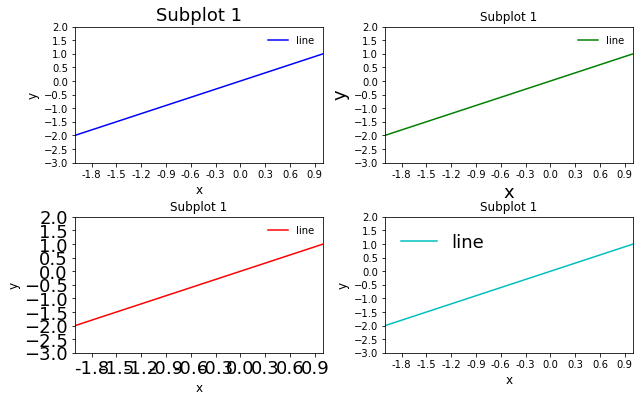

In [25]:
x = np.linspace(-30,40,200)
p = ryplot.Plotter(1,2,2,figsize=(10,6))
p.plot(1,x,x,ptitle='Subplot 1', xlabel='x', ylabel='y',pltaxis=[-2,1,-3,2], 
       label=['line'], titlefsize=18, drawGrid=False)
p.plot(2,x,x,ptitle='Subplot 1', xlabel='x', ylabel='y',pltaxis=[-2,1,-3,2], 
       label=['line'], xylabelfsize=18, drawGrid=False)
p.plot(3,x,x,ptitle='Subplot 1', xlabel='x', ylabel='y',pltaxis=[-2,1,-3,2],
       label=['line'], xytickfsize=18,drawGrid=False)
p.plot(4,x,x,ptitle='Subplot 1', xlabel='x', ylabel='y',pltaxis=[-2,1,-3,2], 
       label=['line'], labelfsize=18,drawGrid=False);

The next example shows the use of dates on the x axis.  In order to fit the long dates in the limited space, the ticks are rotated.

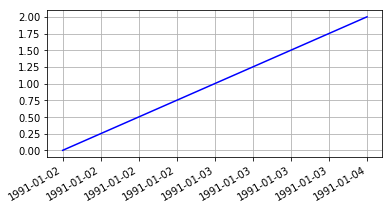

In [26]:
import datetime as dt
dates = ['01/02/1991','01/03/1991','01/04/1991']
x = np.asarray([dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates])
y = np.asarray(range(len(x)))
pd = ryplot.Plotter(1,figsize=(6,3))
pd.plot(1,x,y,xIsDate=True,xtickRotation=30);

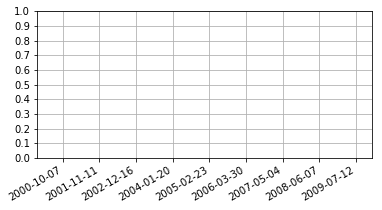

In [27]:
if ryplot.imported_plotly:
    import datetime as dt
    dates = ['01/02/1991','01/03/1991','01/04/1991']
    x = np.asarray([dt.datetime.strptime(d,'%m/%d/%Y').date() for d in dates])
    y = np.asarray(range(len(x)))
    pd = ryplot.Plotter(1,figsize=(6,3),useplotly=True)
    pd.plot(1,x,y,xIsDate=True,xtickRotation=30);
    pd.plotlyPlot()

This example demonstrates the use of arbitrary x-axis tick marks, rotating the tick marks and flipping the x axis, even when using the tick marks.  The arbitrary tick mark x-axis locations are specified in a dictionary, where the key values must correspond to the x-scale values.  Any value to be displayed can be given as the value associated with the key.

The following example also demonstrates how to invert the x axis or y axis. The values on the axis will normally increase from the origin (ascending). If `xInvert=True` or `yInvert=True` the values will be descending away from the origin.

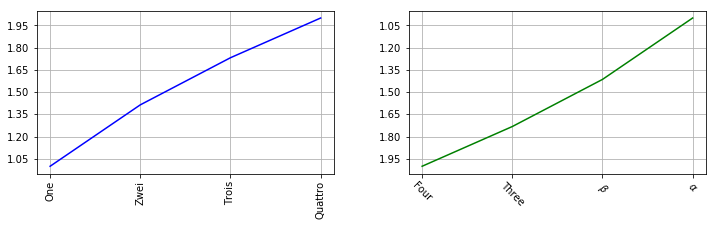

In [28]:
x = np.asarray([1, 2, 3, 4])
y = np.sqrt(x)
px = ryplot.Plotter(2,1,2,figsize=(12,3))
px.plot(1,x,y,xTicks={1:'One', 2:'Zwei', 3:'Trois', 4:'Quattro'}, xtickRotation=90)
px.plot(2,x,y,xTicks={1:r'$\alpha$', 2:r'$\beta$', 3:r'Three', 4:'Four'}, xInvert=True, yInvert=True, xtickRotation=-45);


Sometimes you plot many lines in a single graph using array-format data. In such a case it does not make sense to add parameters for the x-axis labels, etc., to each plot. For this purpose, the   `ryplot.labelSubplot(subplotaxis, ptitle=None, xlabel=None, ylabel=None, zlabel=None, titlefsize=10, labelfsize=10)`  
function annotates the two axes labels and subplot title if given the subplot handle. The user provides the strings for the labels and can also control the font size.

The `zorders` flag sets the order in which lines are drawn in the graph; higher order numbers are drawn last. In the following example the thick line is drawn either first or last.

The parameter `legendLoc` can be used to locate the legend in the graph.  The codes to indicate location are given [here](http://matplotlib.org/api/legend_api.html#matplotlib.legend.Legend.codes) and are as follows:

    codes = {u'right': 5, u'center left': 6, u'upper right': 1, u'lower right': 4, 
             u'best': 0, u'center': 10, u'lower left': 3, u'center right': 7, 
             u'upper left': 2, u'upper center': 9, u'lower center': 8}   
             
         

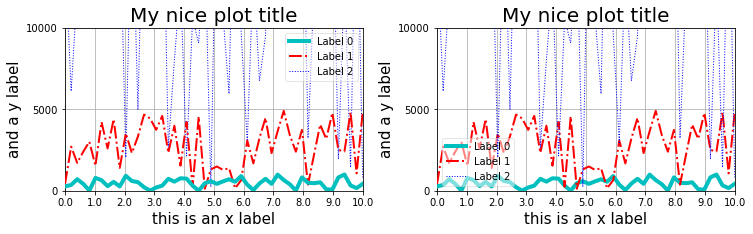

In [29]:
x, a, labels = createRandomColumns(3, 1e3, 5.)

A = ryplot.Plotter(1, 1, 2,figsize=(12,3))
ax = A.plot(1, x, a, label=labels, plotCol=['c','r','b'],
    linestyle=['-','-.',':'], linewidths=[4,2,1],
    legendAlpha=0.5,pltaxis=[0, 10, 0, 10000], maxNX=10, maxNY=2, zorders=[10,5,4])
A.labelSubplot(ax, ptitle='My nice plot title', xlabel='this is an x label',
                   ylabel='and a y label', labelfsize=15, titlefsize=20)
ax = A.plot(2, x, a, label=labels, plotCol=['c','r','b'],
    linestyle=['-','-.',':'], linewidths=[4,2,1],
    legendAlpha=0.5,legendLoc='lower left',pltaxis=[0, 10, 0, 10000], maxNX=10, maxNY=2, zorders=[4,5,10])
A.labelSubplot(ax, ptitle='My nice plot title', xlabel='this is an x label',
                   ylabel='and a y label', labelfsize=15, titlefsize=20);


By default, `clip_on=True`, but if the flag is set to `False`, the graph markers and lines can extend beyond the axes bounds.

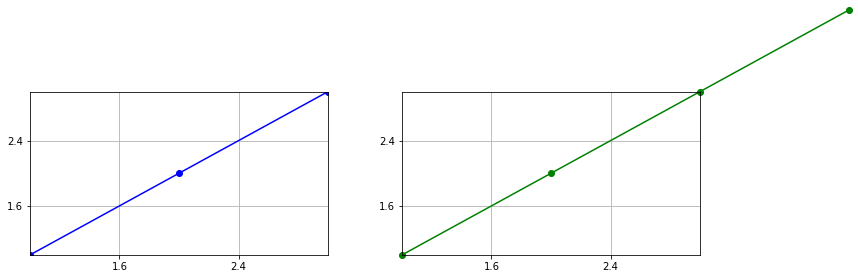

In [30]:
x = np.asarray([1,2,3,4])
y = x

A = ryplot.Plotter(1, 1, 2,figsize=(12,3))
ax = A.plot(1, x, y, maxNX=3, maxNY=3, pltaxis=[1,3,1,3], markers=['o'], clip_on=True )
ax = A.plot(2, x, y, maxNX=3, maxNY=3, pltaxis=[1,3,1,3], markers=['o'], clip_on=False );

The data points in the graph can be marked with a symbol (default is no mark) to identify the data points or the line.  For this purpose the `markers` function parameter can be used to indicate the  [`markers`](http://matplotlib.org/api/markers_api.html) to be used for the lines.  The value of this parameter is a list of strings, with one string per line. The pyplot [`markevery`](http://matplotlib.org/api/artist_api.html#matplotlib.lines.Line2D.set_markevery) functionality is used to set the interval at which the marker must be drawn. The `markevery` values can be one of `None`, `integer` (mark every n'th value), or `(startind, stride)` (start at the first index and then mark mark every n'th value).

The first graph shows a single line plot with no markers.  The second graph shows the same information but with a marker on each data point - which is too dense to be of value.  The marker can be shown at some regular interval, by slicing the data with a stride larger than one. 
The third graph shows a marker at a constant interval, throughout the range.
The fourth graph shows a marker at a constant interval, starting at a specific index into the data set.

The marker types are listed at [http://matplotlib.org/api/markers_api.html](http://matplotlib.org/api/markers_api.html).

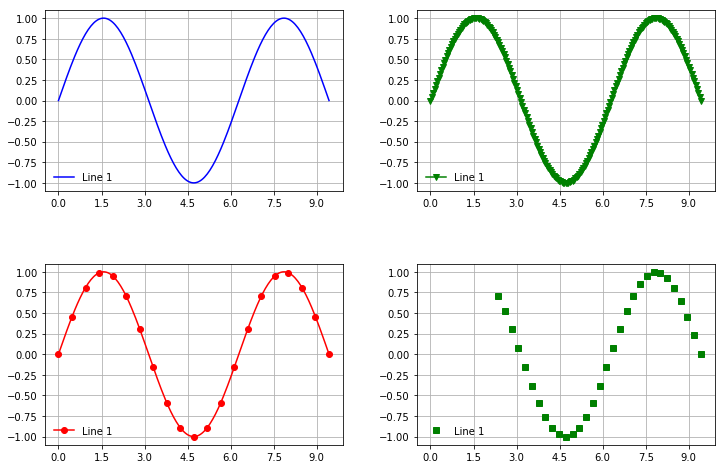

In [31]:
x = np.linspace(0,3*np.pi,201)
y = np.sin(x)
p = ryplot.Plotter(1,2,2, figsize=(12,8))
p.plot(1, x, y, label=['Line 1'])
p.plot(2, x, y, label=['Line 1'], markers=['v'])
p.plot(3, x, y, plotCol=['r'], label=['Line 1'], markers=['o'], markevery=10)
p.plot(4, x, y, plotCol=['g'], label=['Line 1'], linestyle='', markers=['s'], markevery=(50,5));

A short detour in chaos theory.   The following picture is one example of a strange attractor using iterated function systems (IFS). Irrespective of the starting value, the set of iterative IFS equations yield results that are 'attracted' to some stable trajectory.   The interesting aspect here is that the stable trajectory is not known or predicable in exact mathematical or numeric terms.  The trajectory tends toward a stable attractor. When using different starting values this stable attractor is recognisably similar, but never numerically exactly the same.

https://en.wikipedia.org/wiki/Attractor  
http://www.stsci.edu/~lbradley/seminar/attractors.html  
http://www.chaos-math.org/en/chaos-vii-strange-attractors  
http://softology.com.au/tutorials/attractors2d/tutorial.htm  
http://www.chaos.umd.edu/gallery.html  
 


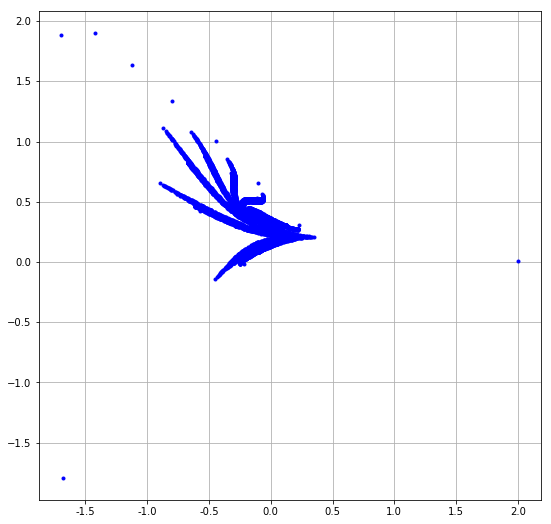

In [32]:
def fracset(rst):
    i = 0
    while i < rst.shape[0]-1:
        rst[i+1,0] = rst[i,1] * (1+np.sin(0.7*rst[i,0])) - 1.2*np.sqrt(np.abs(rst[i,0]))
        rst[i+1,1] = 0.21 - rst[i,0]
        i = i + 1
    return rst

    
numpoints = 5000
rst = np.zeros([numpoints, 2])
rst[0,0] = 2 # or whatever value
rst[0,1] = 0.01 # or whatever value
rst = fracset(rst)

p = ryplot.Plotter(1);
p.plot(1,rst[:,0],rst[:,1], markers=['.'],linestyle='');


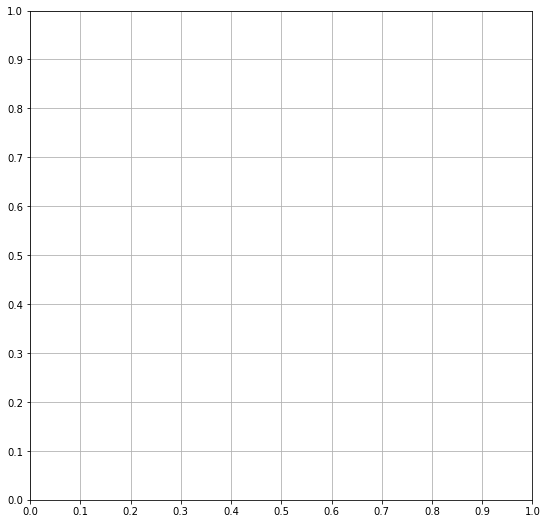

In [33]:
##
# this does not yet work in plotly
if ryplot.imported_plotly:
    p = ryplot.Plotter(1,useplotly=True);
    p.plot(1,rst[:,0],rst[:,1], markers=['.'],linestyle='');
    p.plotlyPlot()

## Pie plots

Sometimes the data on an polar grapg only requires a small angular extent.  The `ryplot.Plotter.pie` function  plots only pie sections of a polar graph.


    def pie(self, plotnum,theta,radius, ptitle=None,angLabel='',radLabel='',
        thetaAxis=[0,360.],radiusAxis=[0,1],plotCol=[], linewidths=None, label=[], legendAlpha=0.0,
        legendLoc='best',linestyle=None,titlefsize = 12,umAngGrid=5, numRadGrid=10,abelfsize=10, 
        drawGrid=True,markers=[],markevery=None,radangfsize = 12, ytickfsize = 10,
        zorders=None, clip_on=True,degreeformatter='%d$^\circ$')



- `plotnum (int)` subplot number, 1-based index
- `theta (np.array[N,] or [N,M])` angular data set in degrees - could be M columns
- `radius (np.array[N,] or [N,M])` radial data set - could be M columns
- `ptitle (string)` plot title (optional)
- `angLabel (string)` angular axis label (optional)
- `radLabel (string)` radial axis label (optional)
- `thetaAxis ([minAngle, maxAnlge])` the angular extent to be displayed, degrees (optional)
- `radiusAxis ([minRad, maxRad])` the radial extent to be displayed, degrees (optional)
- `plotCol ([strings])` plot colour, list with M entries, use default if [] (optional)
- `linewidths ([float])` plot line width in points, list with M entries, use default if None  (optional)
- `label  ([strings])` legend label for ordinate, list with M entries
- `legendAlpha (float)` transparency for legend box
- `legendLoc (string)` location for legend box (optional)
- `linestyle (string)` linestyle for this plot (optional)
- `titlefsize (int)` title font size, default 12pt (optional)
- `numAngGrid (int)` number of grid or tick marks along angular extent
- `numRadGrid (int)` number of grid or tick marks along angular extent
- `labelfsize (int)` label/legend font size, default 10pt (optional)
- `drawGrid (bool)` draw the grid on the plot (optional)
- `markers ([string])` markers to be used for plotting data points (optional)
- `markevery (int | (startind, stride))` subsample when using markers (optional)
- `radangfsize (int)` x-axis, y-axis label font size, default 12pt (optional)
- `xytickfsize (int)` x-axis, y-axis tick font size, default 10pt (optional)
- `zorders` ([int]) list of zorder for drawing sequence, highest is last (optional)
- `clip_on` (bool) clips objects to drawing axes (optional)
- `degreeformatter` (str) format string to defie the angular tick labels (optional)


The file must have a format where the x-axis values are given in the first column, with subsequent columns providing any number of y-axis values.
If such a file has a header line with column titles, the header-line titles can be used to provide x-axis and y-axis labels for the subplots.  The first character of the header line is assumed to be a comment character, e.g., `#` or `%`.
Individual subplots do not have graph titles, but rather one title for the whole graph.  An example of the first few lines of such a file is as follows:

    % time inp1 sine1 sum3 pulse1 sum1 sum2 lim1 filt1 ingr1 sum4 sum5 
    0 0.502 0 0.502 0 0.502 0.502 0.502 0.00741872 3.70936e-05 0.502 -2 
    0.01 0.504 0 0.504 0 0.504 0.503926 0.503926 0.0220653 0.000184514 0.504 -2 
    0.02 0.506 0 0.506 0 0.506 0.505631 0.505631 0.0363327 0.000476504 0.506 -2 

All the lines in the array plot subplots are drawn with the same colour, defined in `allPlotCol`.


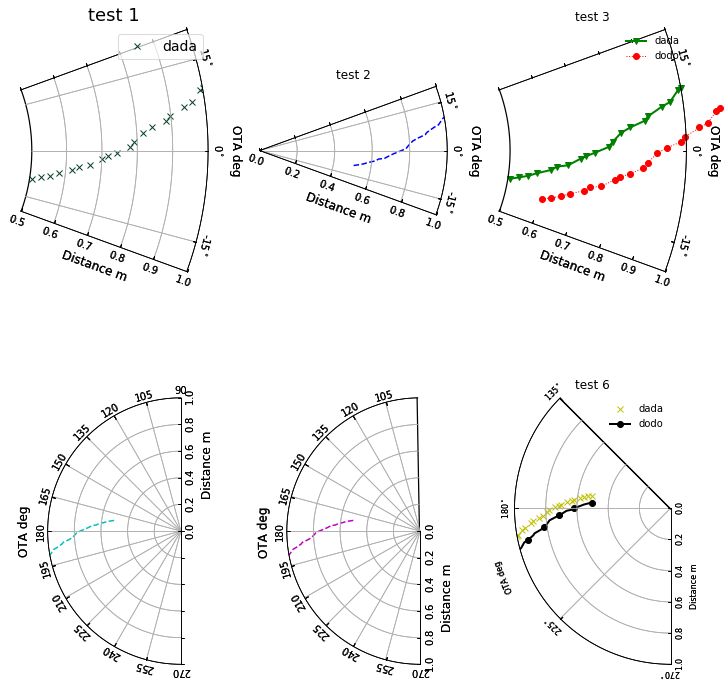

In [34]:
p = ryplot.Plotter(1,2,3,figsize=(12,12));
theta = np.linspace(-10,10,20) + np.random.random(20) # in degrees
radius = np.linspace(.5, 1., 20) + np.random.random(20) /50.
thetax2 = np.hstack((theta.reshape(-1,1), -4 + theta.reshape(-1,1)))
radiusx2 = np.hstack((radius.reshape(-1,1), 0.1+radius.reshape(-1,1)))

# plot one data set
p.pie(1,theta,radius,ptitle='test 1',radLabel='Distance m',angLabel='OTA deg',thetaAxis=[-20,20], radiusAxis=[0.5,1],
    numAngGrid=3, numRadGrid=5,linewidths=[5],linestyle=[''],markers=['x'],label=['dada'],legendAlpha=0.7,
    labelfsize=14,titlefsize=18,plotCol=['#053f22']);

p.pie(2,theta,radius,ptitle='test 2',radLabel='Distance m',angLabel='OTA deg',thetaAxis=[-20,20], radiusAxis=[0.,1],
    numAngGrid=3, numRadGrid=5,linestyle=['--']);

# plot two datasets in one np.array
p.pie(3,thetax2,radiusx2,ptitle='test 3',radLabel='Distance m',angLabel='OTA deg',thetaAxis=[-20,20], radiusAxis=[0.5,1],
    numAngGrid=3, numRadGrid=5,linewidths=[2,1],linestyle=['-',':'],markers=['v','o'],drawGrid=False,
label=['dada','dodo'],clip_on=False);

p.pie(4,theta+180.,radius,ptitle='',radLabel='Distance m',angLabel='OTA deg',thetaAxis=[90,270], radiusAxis=[0.,1],
    numAngGrid=10, numRadGrid=5,linestyle=['--'],degreeformatter="%d");

p.pie(5,theta+180.,radius,ptitle='',radLabel='Distance m',angLabel='OTA deg',thetaAxis=[91,270], radiusAxis=[0.,1],
    numAngGrid=10, numRadGrid=5,linestyle=['--'],degreeformatter="%d");

# use the same subplot more than once
p.pie(6,theta+180,radius,ptitle='test 6',radLabel='Distance m',angLabel='OTA deg',
    thetaAxis=[135,270], radiusAxis=[0,1],xytickfsize=8,numAngGrid=3, numRadGrid=5,
    linewidths=[5],linestyle=[''],markers=['x'],label=['dada'],radangfsize=8);

p.pie(6,theta+185,radius,ptitle='test 6',radLabel='Distance m',angLabel='OTA deg',
    thetaAxis=[135,271], radiusAxis=[0,1],xytickfsize=8,numAngGrid=3, numRadGrid=5,
    linewidths=[2],linestyle=['-'],markers=['o'],label=['dodo'],markevery=4,radangfsize=8);


## Plotting arrays in multiple subplots

Some data files contain array data where each column is a different variable.  The [`ryplot.Plotter.plotArray`](http://nelisw.github.io/pyradi-docs/_build/html/ryplot.html#pyradi.ryplot.Plotter.plotArray) function  

    plotArray(self, plotnum, inarray, slicedim = 0, labels = None, maxNX=0, maxNY=0, 
          titlefsize = 8, xylabelfsize = 8, xytickfsize = 8, selectCols=None, sepSpace=0.2, 
          allPlotCol='r'  )           
provides the functionality to plot different colums in different subplots. 


- `plotnum (int)`  The subplot number, 1-based index, according to Matplotlib conventions.  This value must always be given, even if only a single 1,1 subplot is used.  
- `inarray (np.array)` data series to be plotted.  Data direction can be cols or rows. The abscissa (x axis) values must be the first col/row, with ordinates in following cols/rows. 
- `slicedim (int)` slice along columns (0) or rows (1) (optional).
- `labels ([str])` a list of strings as labels for each subplot.  x=labels[0], y=labels[1:] (optional).
- `maxNX (int)` draw maxNX+1 tick labels on x axis (optional).  
- `maxNY (int)` draw maxNY+1 tick labels on y axis (optional).  
- `titlefsize (int)` title font size, default 12pt (optional).  
- `xylabelfsize (int)` x-axis, y-axis label font size, default 12pt (optional).  
- `xytickfsize (int)` x-axis, y-axis tick font size, default 10pt (optional).  
- `selectCols ([int])` select columns for plot. Col 0 corresponds to col 1 in input data (because col 0 is abscissa),plot  all if not given (optional).  
- `sepSpace (float)` vertical spacing between sub-plots in inches (optional).  
- `allPlotCol (str)` make all plot lines this colour (optional).  


The file must have a format where the x-axis values are given in the first column, with subsequent columns providing any number of y-axis values.
If such a file has a header line with column titles, the header-line titles can be used to provide x-axis and y-axis labels for the subplots.  The first character of the header line is assumed to be a comment character, e.g., `#` or `%`.
Individual subplots do not have graph titles, but rather one title for the whole graph.  An example of the first few lines of such a file is as follows:

    % time inp1 sine1 sum3 pulse1 sum1 sum2 lim1 filt1 ingr1 sum4 sum5 
    0 0.502 0 0.502 0 0.502 0.502 0.502 0.00741872 3.70936e-05 0.502 -2 
    0.01 0.504 0 0.504 0 0.504 0.503926 0.503926 0.0220653 0.000184514 0.504 -2 
    0.02 0.506 0 0.506 0 0.506 0.505631 0.505631 0.0363327 0.000476504 0.506 -2 

All the lines in the array plot subplots are drawn with the same colour, defined in `allPlotCol`.


In [35]:
import pyradi.ryfiles as ryfiles
import pyradi.ryutils as ryutils
# import pyradi.ryplot as ryplot
# import numpy as np

tgzFilename = 'arrayplotdemo.tgz'
destinationDir = '.'
tarFilename = 'arrayplotdemo.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)

print('filesAvailable are {}'.format(dlNames))

filesAvailable are ['arrayplotdemo.txt']


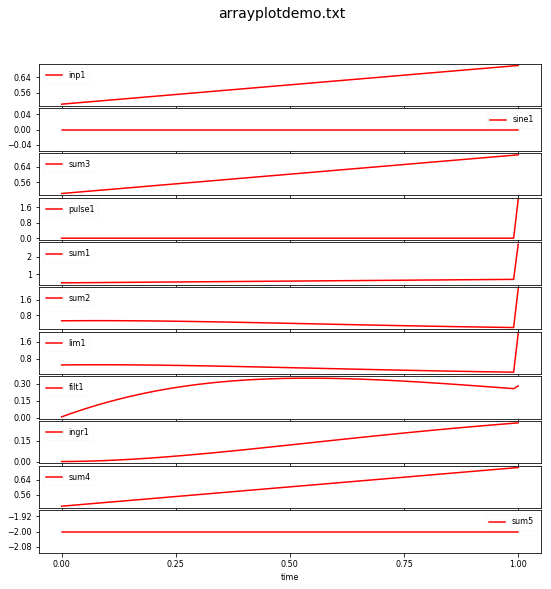

In [36]:
filename = "arrayplotdemo.txt"
f = open(filename)
lines = f.readlines()
#the labels are in the first line (row). Skip the '%' symbol
labels = lines[0].split()[1:]
#the array is the rest of the file
arrDummyDemo = np.genfromtxt(filename,skip_header=1)
#the figure title is the filename
maintitle = filename.split('/')[-1]

Ar = ryplot.Plotter(9, 1, 1,maintitle)
Ar.plotArray(1,arrDummyDemo, 0, labels=labels, titlefsize = 12, maxNX = 5, maxNY=3,
    sepSpace=0.05)

Only selected columns or rows can be plotted with the array plot function, using the `selectCols` parameter.  In the following code two plots are superimposed on each other, each with its own separate colour.

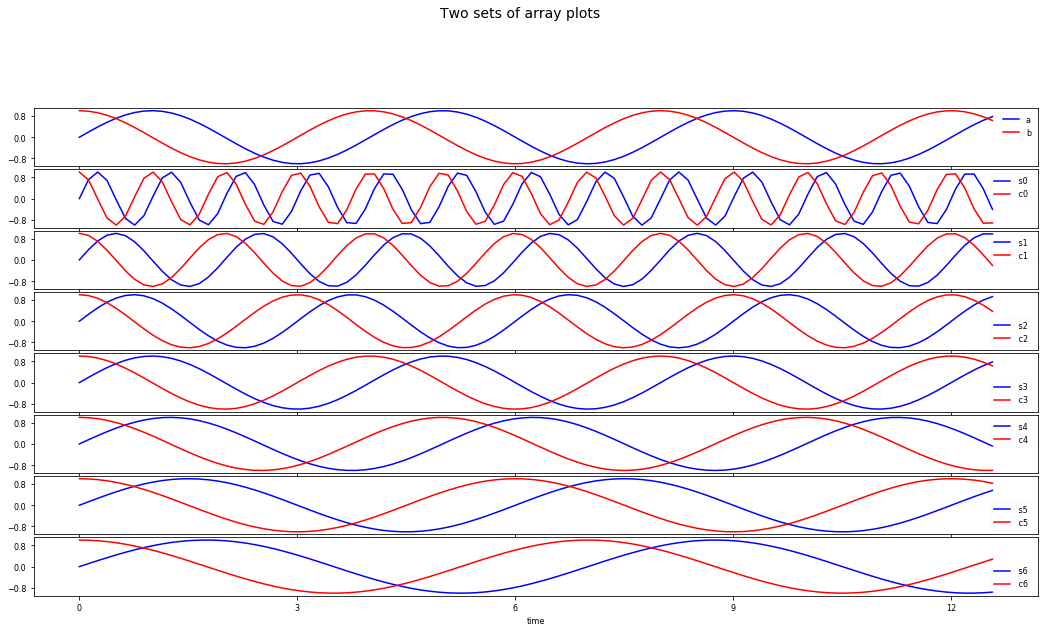

In [37]:
import numpy as np
import pyradi.ryplot as ryplot
t = np.linspace(0, 4 * np.pi, 100).reshape(-1,1)
arr = np.hstack((t,   np.sin(t * 2 * np.pi / 4.0)))
arr = np.hstack((arr, np.cos(t * 2 * np.pi / 4.0)))
labels = ['time','a','b']
for i in range(7):
    arr = np.hstack((arr, np.sin(t * 2 * np.pi / (i+1))))
    arr = np.hstack((arr, np.cos(t * 2 * np.pi / (i+1))))
    labels.append(' s{} '.format(i))
    labels.append(' c{} '.format(i))

Ar2 = ryplot.Plotter(10, 1, 1,'Two sets of array plots', figsize=(18,18))
Ar2.plotArray(1,arr, 0, labels=labels, titlefsize = 12, maxNX = 5, maxNY=3,
    sepSpace=0.05,selectCols=[0,2,4,6,8,10,12,14],allPlotCol='b')
Ar2.plotArray(1,arr, 0, labels=labels, titlefsize = 12, maxNX = 5, maxNY=3,
    sepSpace=0.05,selectCols=[1,3,5,7,9,11,13,15], allPlotCol='r')


## Plotting graphs not available in pyradi/ryplot

The ryplot module provides a variety of graph types but it does not provide all the richness of plot types available in Matplotlib.  To this end, ryplot provides a function that creates and returns a handle to a subplot entity, but does not plot anything in the subplot space.   The use can use this handle to gain access to the subplot and then use standard Matplotlib commands to do whatever is required and available in Matplotlib.

    emptyPlot(self, plotnum, projection='rectilinear')           
creates and returns a handle to the empy plot.

- `plotnum (int)`  The subplot number, 1-based index, according to Matplotlib conventions.  This value must always be given, even if only a single 1,1 subplot is used. 
- `projection (str)` type of axes projection, default is `rectilinear`. Can be any of  [`aitoff`, `hammer`, `lambert`, `mollweide`, `polar`, `rectilinear`].


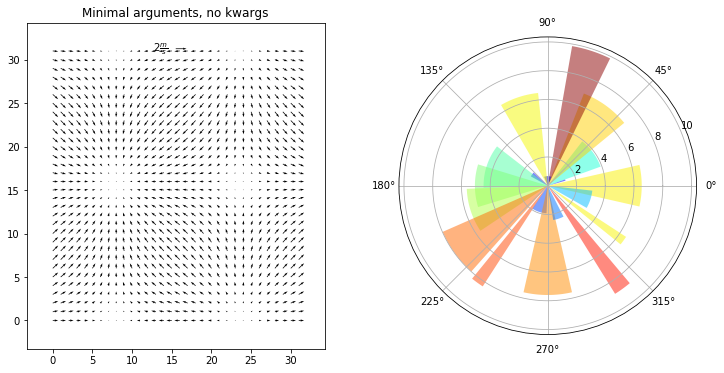

In [38]:
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)
p = ryplot.Plotter(1,1,2,figsize=(12,6));
p.emptyPlot(1)
Q = p.getSubPlot(1).quiver(U,V);
p.getSubPlot(1).quiverkey(Q, 0.5, 0.92, 2, r'$2 \frac{m}{s}$', labelpos='W',
                   fontproperties={'weight': 'bold'})
l, r, b, t = plt.axis()
dx, dy = r - l, t - b
plt.axis([l - 0.05*dx, r + 0.05*dx, b - 0.05*dy, t + 0.05*dy])
plt.title('Minimal arguments, no kwargs')

####################
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
p.emptyPlot(2, projection='polar')
bars = p.getSubPlot(2).bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)




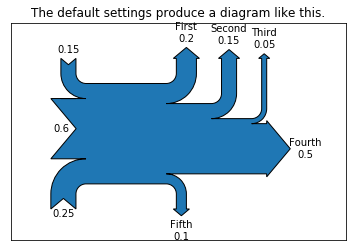

In [39]:
# the empty ryplot handle does not always work, sometimes skip ryplot altogether...

from matplotlib.sankey import Sankey

Sankey(flows=[0.25, 0.15, 0.60, -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['', '', '', 'First', 'Second', 'Third', 'Fourth', 'Fifth'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("The default settings produce a diagram like this.")


## Vector fields

https://www.getdatajoy.com/examples/python-plots/vector-fields  
http://scicomp.stackexchange.com/questions/18760/visually-appealing-ways-to-plot-singular-vector-fields-with-matplotlib-or-other  



## Python and [module versions, and dates](https://github.com/rasbt/watermark)

In [40]:
# to get software versions
# https://github.com/rasbt/watermark
# you only need to do this once
# pip install watermark

%load_ext watermark
%watermark -v -m -p numpy,scipy,pyradi -g 

CPython 3.6.1
IPython 5.3.0

numpy 1.12.1
scipy 0.19.0
pyradi 1.1.3

compiler   : MSC v.1900 64 bit (AMD64)
system     : Windows
release    : 7
machine    : AMD64
processor  : Intel64 Family 6 Model 94 Stepping 3, GenuineIntel
CPU cores  : 8
interpreter: 64bit
Git hash   : c3b80d743fe636f891ac6123908a9228c749c47e
